# QRM First Assignment

Questions so far:
1. What is the difference between Close and Adj. Close? Which to use?
2. np.log is used for natural logarithm, right?
(Natural logarithm, element-wise. --copied from documentation page)

**Close price adjusted for splits.** 
<br>
''The closing price of a stock is the price of that stock at the close of the trading day.''


**Adjusted close price adjusted for both dividends and splits.**
<br>
''The adjusted closing price is a more complex analysis that uses the closing price as a starting point, but it takes into account factors such as dividends, stock splits and new stock offerings to determine a value. The adjusted closing price represents a more accurate reflection of a stock's value, since distributions and new offerings can alter the closing price.''

So I think in the sense of these dataset, the close price is also a kind of adjusted price since it is adjusted for splits.<br>
I personally would think the adjusted close price (both div and splits) would be better since it's more accurate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import statsmodels.api as sm
from scipy.optimize import minimize
import scipy as sc
import glob
import matplotlib.pyplot as plt
import os
#from arch import arch_model
#from fnGARCH_2 import *

In [2]:
BTC = pd.read_csv("01_Data/BTCUSD.csv",)
DBC = pd.read_csv("01_Data/DBC.csv")
DE_1YBOND = pd.read_csv("01_Data/DE_1YBOND.csv")
GSPC = pd.read_csv("01_Data/GSPC.csv")
N225 = pd.read_csv("01_Data/N225.csv") #this is not working?

In [3]:
BTC.head() 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-03-31,0.7897,0.7680,0.8010,0.7846,0.7846,542900
1,2011-04-01,0.7846,0.7741,0.7970,0.7741,0.7741,248300
2,2011-04-04,0.7790,0.5619,0.7850,0.6800,0.6800,2165200
3,2011-04-05,0.6800,0.5800,0.7478,0.7100,0.7100,652200
4,2011-04-06,0.7100,0.6902,0.7500,0.7400,0.7400,626400


## Exploratory Data Analysis

1. Create lag variable of the adj.close column to calculate portfolio returns
2. Calculate portfolio returns using natural logarithm: log-return ui= ln(Si/Si-1)
2. Using the historical returns, assess the validity of the normal approximation: a) by comparing the histograms to the densities of the normal distribution b) by a QQ-plot

In [4]:
#1.Create lag
BTC['adj_close_lag'] = BTC['Adj Close'].shift(1)
#Calculate asset returns - later to be done for the whole portfolio
BTC['btc_return'] = np.log(BTC['Adj Close']/BTC['adj_close_lag']) 
BTC.head()

,Date,Open,High,Low,Close,Adj Close,Volume,adj_close_lag,btc_return
0,2011-03-31,0.7897,0.7680,0.8010,0.7846,0.7846,542900,NaN,NaN
1,2011-04-01,0.7846,0.7741,0.7970,0.7741,0.7741,248300,0.7846,-0.013473
2,2011-04-04,0.7790,0.5619,0.7850,0.6800,0.6800,2165200,0.7741,-0.129608
3,2011-04-05,0.6800,0.5800,0.7478,0.7100,0.7100,652200,0.6800,0.043172
4,2011-04-06,0.7100,0.6902,0.7500,0.7400,0.7400,626400,0.7100,0.041385


C:\Users\Asus\.conda\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\Asus\.conda\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\Asus\.conda\envs\py37\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


((array([-3.43613514, -3.18806125, -3.05063292, ...,  3.05063292,
          3.18806125,  3.43613514]),
  array([-0.84876461, -0.46473041, -0.45154429, ...,  0.59337118,
          1.47439456,         nan])),
 (nan, nan, nan))

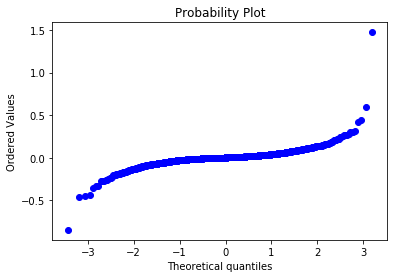

In [5]:
#Create QQ-plot 
sc.stats.probplot(BTC['btc_return'], dist="norm", plot=plt) 

To-do (preprocessing):
1. Debug Nikkei data (import-solved)
2. Merge all datasets together
3. Calculate portfolio returns
4. Create QQ plot again for the whole portfolio

In [6]:
print(BTC.shape)
print(DBC.shape)
print(DE_1YBOND.shape)
print(GSPC.shape)
print(N225.shape)

(2349, 9)
(2264, 7)
(2586, 6)
(2264, 7)
(2225, 7)


In [7]:
'''The attribute format of this bond is different from others, is it a problem? '''
DE_1YBOND.head()

,Date,Price,Open,High,Low,Change %
0,"Mar 31, 2020",-0.650,-0.717,-0.626,-0.748,-5.66%
1,"Mar 30, 2020",-0.689,-0.685,-0.658,-0.881,-1.85%
2,"Mar 27, 2020",-0.702,-0.626,-0.600,-0.920,14.89%
3,"Mar 26, 2020",-0.611,-0.645,-0.562,-0.679,-3.63%
4,"Mar 25, 2020",-0.634,-0.615,-0.557,-0.674,4.97%


Check if there is null or empty input

In [8]:
BTC.isnull().sum()

#this null value is due to the shift, so it won't cause problem

Date             0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
adj_close_lag    1
btc_return       1
dtype: int64

In [9]:
DBC.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
DE_1YBOND.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [11]:
GSPC.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
N225.isnull().sum()

Date          0
Open         20
High         20
Low          20
Close        20
Adj Close    20
Volume       20
dtype: int64

There are 20 empty values in the data, we can maybe delete them 

20 data points are not much compared to 2225 data points total

In [13]:
'''Try with two datasets '''
frames = [GSPC, DBC]
result = pd.concat(frames)
result.shape

(4528, 7)

In [66]:
#1.Create lag
result['adj_close_lag'] = result['Adj Close'].shift(1)
#Calculate asset returns - later to be done for the whole portfolio
result['result_return'] = np.log(result['Adj Close']/result['adj_close_lag']) 
result.shape

(4528, 9)

((array([-3.61005085, -3.3731651 , -3.24252529, ...,  3.24252529,
          3.3731651 ,  3.61005085]),
  array([-4.48420737, -0.1276522 , -0.09994485, ...,  0.08880841,
          0.08968323,         nan])),
 (nan, nan, nan))

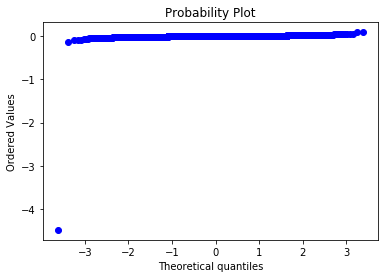

In [67]:
#Create QQ-plot 
sc.stats.probplot(result['result_return'], dist="norm", plot=plt) 

Obviously there is an outlier

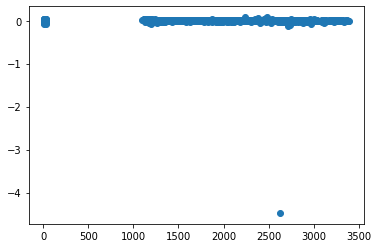

In [68]:
plt.scatter(result['adj_close_lag'],result['result_return'])

In [71]:
result.index[result['result_return']< -1].tolist()

[0]

In [72]:
result_no_outlier = result.drop(result.index[0])

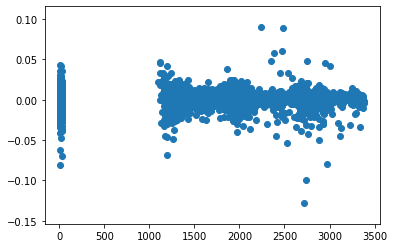

In [73]:
plt.scatter(result_no_outlier['adj_close_lag'],result_no_outlier['result_return'])

((array([-3.60993626, -3.37304347, -3.24239941, ...,  3.24239941,
          3.37304347,  3.60993626]),
  array([-0.1276522 , -0.09994485, -0.08104121, ...,  0.06054383,
          0.08880841,  0.08968323])),
 (0.00981020111771014, -6.028519259216899e-05, 0.9466113868257154))

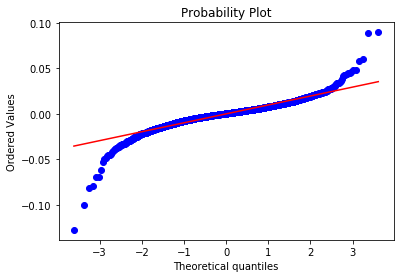

In [74]:
sc.stats.probplot(result_no_outlier['result_return'], dist="norm", plot=plt) 

**Discussion:**
1. Drop the 20 rows for N225 dataset?
AM: Good question, should we ask the professor how to deal with that? 
2. The DE_1YBOND attribute doesn't match with other 4, will the attribute affect the analysis? If not then we can keep them
AM: This is because the first 4 datasets are from Yahoo data and this one is from another source. It's not a problem as long as we can merge it by Date to the rest of the data.
3. There would defo some outliers in the data, we shoud decide how to deal with them.
AM: Good question, let's ask.

**09-April-2020**
**AM Comments:**
   1. I think that trying with 2 datasets should happen in a bit different way
   2. Isolate the columns of adj. price for each asset and give them clear names to which asset they belong
   3. Perform a join with on the Date variable (I think the concat function is not doing the job here)

I did these steps below:  

In [59]:
'''Rename Price column'''
BTC.rename(columns={'Adj Close':'Price_BTC'}, 
                 inplace=True)
DBC.rename(columns={'Adj Close':'Price_DBC'}, 
                 inplace=True)
GSPC.rename(columns={'Adj Close':'Price_GSPC'}, 
                 inplace=True)
N225.rename(columns={'Adj Close':'Price_N225'}, 
                 inplace=True)

'''Create lags for all assets'''
BTC['Price_BTC_lag'] = BTC['Price_BTC'].shift(1)
DBC['Price_DBC_lag'] = DBC['Price_DBC'].shift(1)
GSPC['Price_GSPC_lag'] = GSPC['Price_GSPC'].shift(1)
N225['Price_N225_lag'] = N225['Price_N225'].shift(1)

'''Calculate individual asset returns'''
BTC['BTC_return'] = np.log(BTC['Price_BTC']/BTC['Price_BTC_lag']) 
DBC['DBC_return'] = np.log(DBC['Price_DBC']/DBC['Price_DBC_lag']) 
GSPC['GSPC_return'] = np.log(GSPC['Price_GSPC']/GSPC['Price_GSPC_lag']) 
N225['N225_return'] = np.log(N225['Price_N225']/N225['Price_N225_lag']) 

'''Keep only relevant columns'''
BTC = BTC[['Date', 'Price_BTC', 'Price_BTC_lag', 'BTC_return']]
DBC = DBC[['Date', 'Price_DBC', 'Price_DBC_lag', 'DBC_return']]
GSPC = GSPC[['Date', 'Price_GSPC', 'Price_GSPC_lag', 'GSPC_return']]
N225 = N225[['Date', 'Price_N225', 'Price_N225_lag', 'N225_return']]

In [60]:
'''Merge asset datasets - inner join depending on BTC (first datset) - this needs to be updated'''
result=pd.merge(BTC,DBC, how='inner', left_index=True, right_index=True)
result2=pd.merge(result,GSPC, how='inner', left_index=True, right_index=True)
df=pd.merge(result2,N225, how='inner', left_index=True, right_index=True)

In [61]:
'''Assume equal weight (0.25) for the 4 assets and calculate portfolio returns - later to change it when we also add the bond'''
df['portfolio_return'] = 0.25*df['BTC_return'] + 0.25*df['DBC_return'] + 0.25*df['GSPC_return'] + 0.25*df['N225_return'] 

((array([-3.42141733, -3.17234904, -3.03431314, ...,  3.03431314,
          3.17234904,  3.42141733]),
  array([-0.21164006, -0.11377154, -0.09983359, ...,         nan,
                 nan,         nan])),
 (nan, nan, nan))

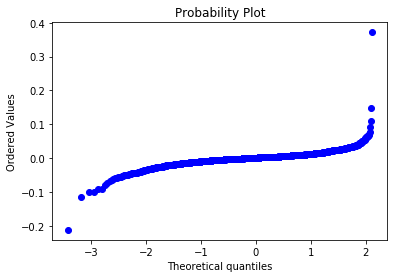

In [62]:
'''Create QQ-plot'''
sc.stats.probplot(df['portfolio_return'], dist="norm", plot=plt)

##### I suggest to keep log of our Methodology and Questions and write email to Svetlana/Sarah next week to verify and ask - do you agree?

**Methodology**
1. Create lags for each individual asset and compute individual asset returns
2. Merge the individual asset datasets and compute portfolio returns and portfolio standard deviation

**Questions**
1. How to deal with unmatching data (i.e. there is obs. for a particular dataset for one asset but none for another asset?). Should we delete all observations for that date altogether? How do we deal with the gap in history?
2. How to deal with outlier

##### Question: My code above looks ugly as I am doing the operations for each dataset separately instead of using some kind of loop to iterate. Can we, please, set up a short call so you can teach me how to do the iteration? :D 